In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap


In [4]:
df = pd.read_csv('data/dataset_filtered.csv')


In [ ]:
dfDict = dict()
# get unique latitudes and longitudes in df
for index, row in df.iterrows():
    lat = row['lat']
    lon = row['lon']
    if lat not in dfDict:
        dfDict[lat] = dict()
    # if lon not in dfDict[lat]:
    #     dfDict[lat][lon] = dict()
    dfDict[lat][lon] = row['ALLSKY_SFC_SW_DWN']


lat = float(-90)
lats = np.linspace(-90, 90, 180*2 + 1)
lons = np.linspace(-180, 180, 360*2 + 1)

arr = []
for lat in lats:
    currRow = []
    for lon in lons:
        if lat in dfDict and lon in dfDict[lat]:
            # currRow.append(1)
            currRow.append(dfDict[lat][lon])
        else:
            currRow.append(np.NaN)
    arr.append(currRow)

npGrid = np.ma.masked_equal(np.array(arr), np.NaN)

In [19]:
df.columns

Index(['lat', 'lon', 'RH2M', 'T2M', 'PS', 'PRECTOTCORR_SUM',
       'ALLSKY_SFC_SW_DWN', 'cld', 'pet'],
      dtype='object')

C:\Users\Definitive\AppData\Local\Temp\ipykernel_21372\50977017.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  m.pcolormesh(lons, lats, npGrid, latlon=True, cmap='jet', snap=True)


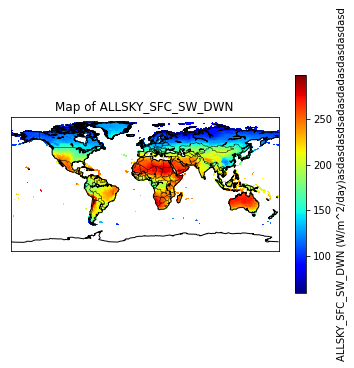

In [20]:
# for i in range(0, 180*2 + 1):
#     lats.append(lat)
#     lat = round(lat + 0.5, 1)
# for x in range(0, 360*2 + 1):
#     lon = float(-180)
#     finalDataset[lat][lon]

#     lon = round(lon + 0.5, 1)
    

# dfLats = df['lat'].unique()
# lons = df['lon'].unique()
# for lat in lats:
#     dfDict[lat] = dict()
#     for lon in lons:
#         dfDict[lat][lon] = None

# iterate through each row of dataframe and add to dictionary with latitude and longitude keys

# https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

from itertools import chain

def getColorMeshData(currDf, targetVar):
    dfDict = dict()
    # get unique latitudes and longitudes in df
    for index, row in currDf.iterrows():
        lat = row['lat']
        lon = row['lon']
        if lat not in dfDict:
            dfDict[lat] = dict()
        dfDict[lat][lon] = row[targetVar]


    lat = float(-90)
    lats = np.linspace(-90, 90, 180*2 + 1)
    lons = np.linspace(-180, 180, 360*2 + 1)

    arr = []
    for lat in lats:
        currRow = []
        for lon in lons:
            if lat in dfDict and lon in dfDict[lat]:
                # currRow.append(1)
                currRow.append(dfDict[lat][lon])
            else:
                currRow.append(np.NaN)
        arr.append(currRow)

    return lons, lats, np.ma.masked_equal(np.array(arr), np.NaN)

def draw_map():
    m = Basemap()
    lons, lats, npGrid = getColorMeshData(df, 'ALLSKY_SFC_SW_DWN')
    # draw a shaded-relief image
    m.drawcoastlines()
    m.drawcountries()

    lons, lats = np.meshgrid(lons, lats)
    m.pcolormesh(lons, lats, npGrid, latlon=True, cmap='jet', snap=True)
    plt.title("Map of ALLSKY_SFC_SW_DWN")
    labelDict = {
        'ALLSKY_SFC_SW_DWN': 'ALLSKY_SFC_SW_DWN (W/m^2/day)',
        'RH2M': 'RH2M'
    }
    # ['lat', 'lon', 'RH2M', 'T2M', 'PS', 'PRECTOTCORR_SUM',
    #   'ALLSKY_SFC_SW_DWN', 'cld', 'pet']
    plt.colorbar(label=r'ALLSKY_SFC_SW_DWN (W/m^2/day)asdasdasdsadasdadasdasdasdasd')


# fig = plt.figure(figsize=(8, 6), edgecolor='w')

# label figure with the text "World Map w/filtered ALLSKY_SFC_SW_DWN data"
draw_map()


In [9]:
#print number of unique lats and number unique lons
print(len(df['lat'].unique()))
print(len(df['lon'].unique()))

283
721


In [4]:
# for each variable excluding lat and lon, print a five number summary
for col in df.columns:
    if col != 'lat' and col != 'lon':
        print(col)
        print(df[col].describe())
        print('\n')



RH2M
count    78437.000000
mean        74.055392
std         19.450148
min         17.343750
25%         63.531250
50%         80.000000
75%         89.718750
max         98.937500
Name: RH2M, dtype: float64


T2M
count    78437.000000
mean       282.748372
std         14.667067
min        244.746094
25%        270.035156
50%        283.773438
75%        297.320312
max        306.687500
Name: T2M, dtype: float64


PS
count     78437.000000
mean      95513.493900
std        7753.361171
min       51411.593750
25%       93864.031250
50%       98199.500000
75%      100476.781250
max      102268.156250
Name: PS, dtype: float64


PRECTOTCORR_SUM
count    78437.000000
mean         0.009423
std          0.008002
min          0.000001
25%          0.004110
50%          0.007420
75%          0.012162
max          0.118562
Name: PRECTOTCORR_SUM, dtype: float64


ALLSKY_SFC_SW_DWN
count    78437.000000
mean       174.231878
std         57.809306
min         59.308594
25%        118.097656
50%     

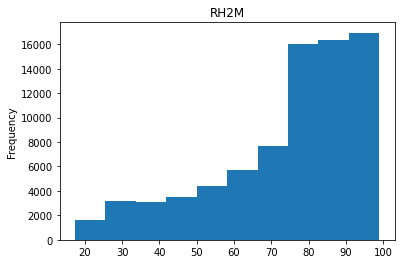

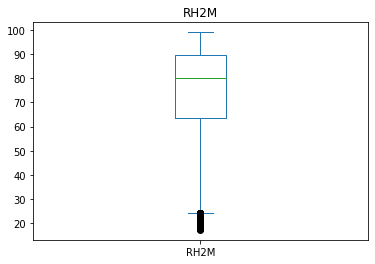

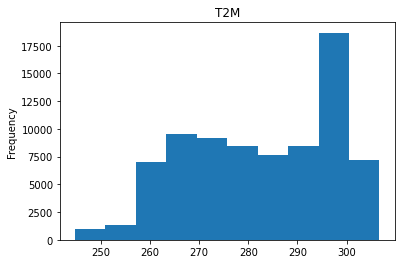

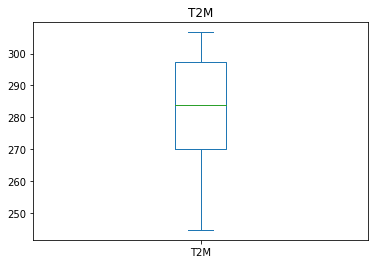

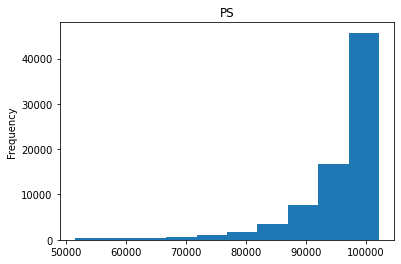

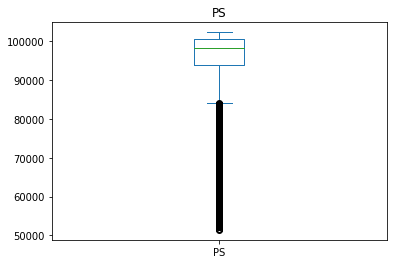

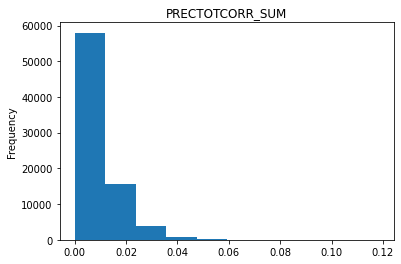

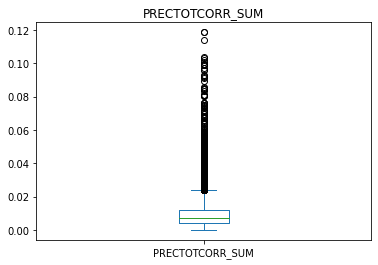

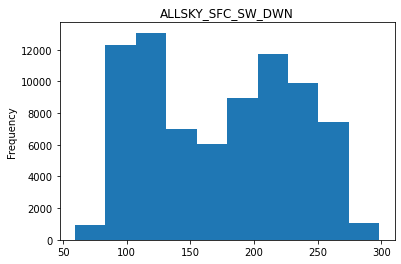

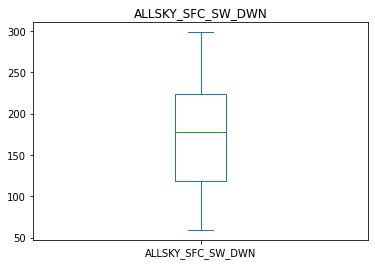

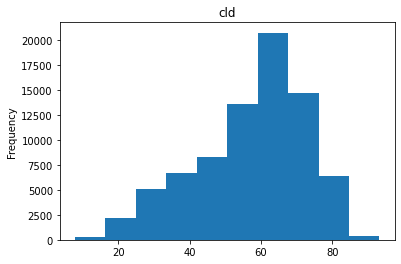

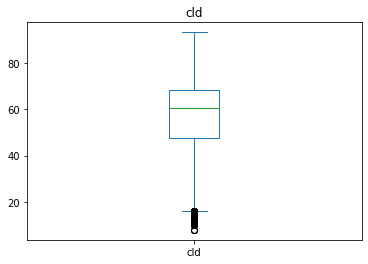

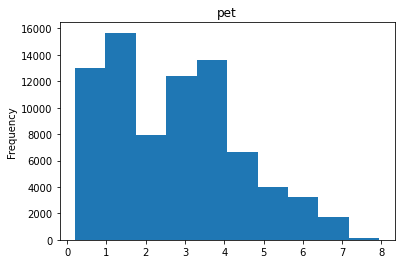

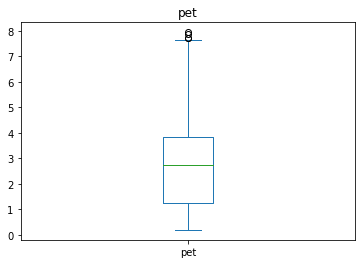

In [5]:
# for each variable excluding lat and lon, create a histogram and boxplot

for col in df.columns:
    if col != 'lat' and col != 'lon':
        df[col].plot.hist()
        plt.title(col)
        plt.show()
        df[col].plot.box()
        plt.title(col)
        plt.show()


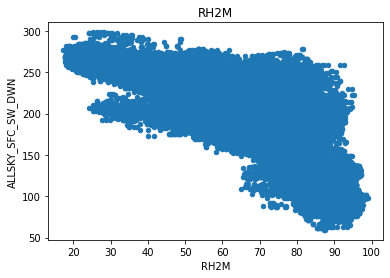

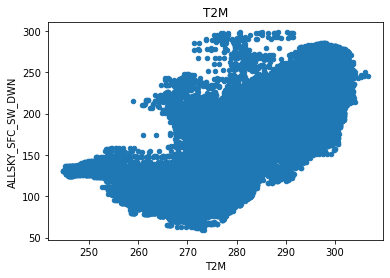

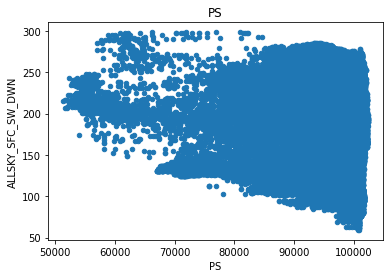

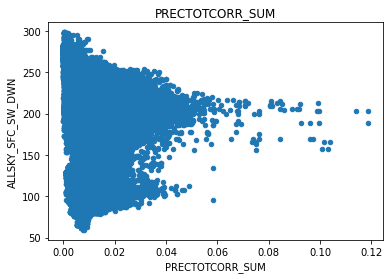

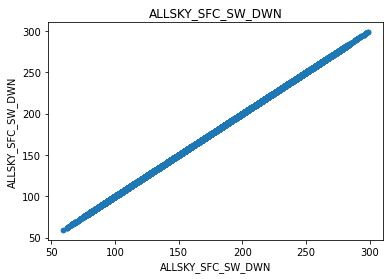

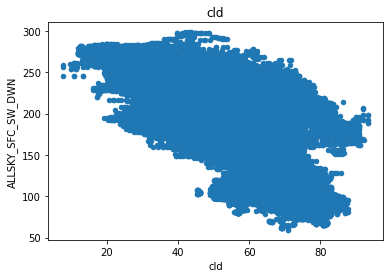

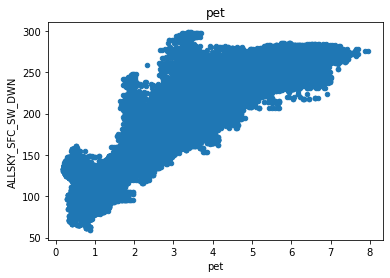

In [7]:
# for each variable excluding lat and lon, create a scatterplot with the variable as x and ALLSKY_SFC_SW_DWN as y
# scatterAxesDict = dict()
for col in df.columns:
    if col != 'lat' and col != 'lon':
        scatterAxes = df.plot.scatter(x=col, y='ALLSKY_SFC_SW_DWN')
        # scatterAxesDict[col] = scatterAxes
        plt.title(col)
        plt.show()


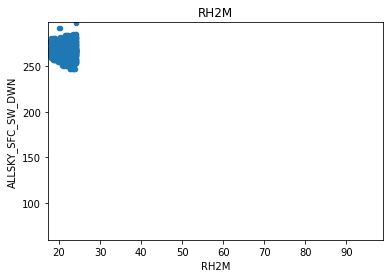

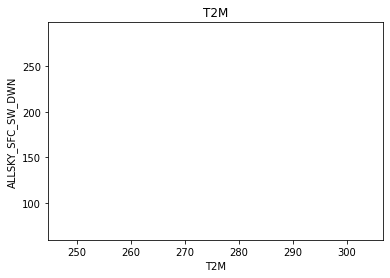

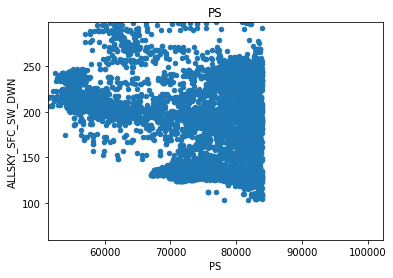

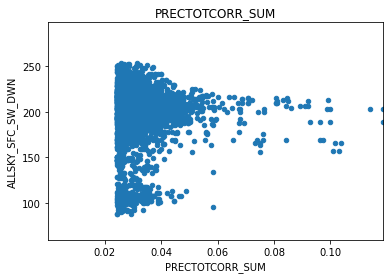

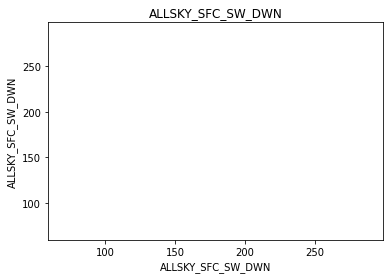

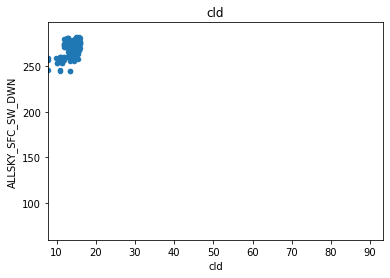

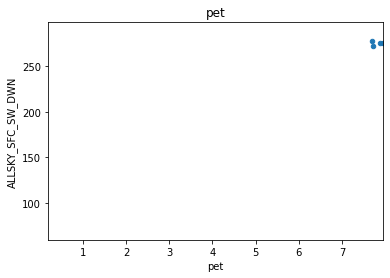

In [14]:
# for each variable excluding lat and lon, identify outliers using IQR and plot them
for col in df.columns:
    if col != 'lat' and col != 'lon':
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        # make a scatterplot using the original min max scale from df
        outliers.plot.scatter(x=col, y='ALLSKY_SFC_SW_DWN')
        plt.xlim(df[col].min(), df[col].max())
        plt.ylim(df['ALLSKY_SFC_SW_DWN'].min(), df['ALLSKY_SFC_SW_DWN'].max())
        plt.title(col)
        plt.show()